In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1) 
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import wordnet
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
import pickle
from collections import Counter
from itertools import chain
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
df = pd.read_csv('/content/new_file.csv')

In [ ]:
len(df)

480468

In [ ]:
df.head(5)

,Unnamed: 0,target,timestamp,username,text,text_lemmatized,text_nostopwords,text_stemmed,low_removed
0,0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"['switchfoot', 'httptwitpiccom2y1zl', 'awww', 'thats', 'a', 'bummer', 'you', 'shoulda', 'get', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']",switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day,switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day,awww thats bummer get david carr third day
1,7,0,Mon Apr 06 22:20:03 PDT 2009,coZZ,loltrish hey long time no see yes rains a bit only a bit lol im fine thanks hows you,"['loltrish', 'hey', 'long', 'time', 'no', 'see', 'yes', 'rain', 'a', 'bit', 'only', 'a', 'bit', 'lol', 'im', 'fine', 'thanks', 'hows', 'you']",loltrish hey long time see yes rain bit bit lol fine thanks hows,loltrish hey long time see yes rain bit bit lol fine thanks how,hey long time see yes rain bit bit lol fine thanks how
2,8,0,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,tatiana_k nope they didnt have it,"['tatiana_k', 'nope', 'they', 'didnt', 'have', 'it']",tatiana_k nope didnt,tatiana_k nope didnt,nope didnt
3,9,0,Mon Apr 06 22:20:09 PDT 2009,mimismo,twittera que me muera,"['twittera', 'que', 'me', 'muera']",twittera que muera,twittera que muera,que
4,14,0,Mon Apr 06 22:20:20 PDT 2009,bayofwolves,smarrison i wouldve been the first but i didnt have a gun not really though zac snyders just a doucheclown,"['smarrison', 'i', 'wouldve', 'be', 'the', 'first', 'but', 'i', 'didnt', 'have', 'a', 'gun', 'not', 'really', 'though', 'zac', 'snyders', 'just', 'a', 'doucheclown']",smarrison wouldve first didnt gun really though zac snyders doucheclown,smarrison wouldve first didnt gun really though zac snyders doucheclown,wouldve first didnt gun really though zac


In [ ]:
df.drop(columns= 'Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['target', 'timestamp', 'username', 'text', 'text_lemmatized',
       'text_nostopwords', 'text_stemmed', 'low_removed'],
      dtype='object')

In [ ]:
df = df.sample(n = 50000)

## Train Test Split and Vectorization

In [ ]:
X = df['low_removed']
y = df['target']

In [ ]:
X

30349     bad would go time get                                        
417088    walk ya kitchen cook nah u want ba                           
47324     thats try avoid                                              
426828    guess get comment honor societi                              
367787    jonasbrothers woah big crowd hope come philippine soon       
                                   ...                                 
238310    id suggest male remember dont like draw form â               
285413    lose yesterday least peaceful gonna go see mom today cheer   
249784    worried bad root gonna look grows bet hair look cute wanna se
152671    wear june oh denmark                                         
351175    sleep puppy puppy cuddle next                                
Name: low_removed, Length: 50000, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(max_df = 20, min_df = 15)

In [ ]:
X_vect = vectorizer.fit_transform(X.values.astype(str))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vect,y,test_size=0.33, random_state=42) 

In [ ]:
X_train.shape

(33500, 619)

## Dimensionality Reduction


In [ ]:
svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=300, random_state=42)

In [ ]:
X_train_svd = svd.transform(X_train)

In [ ]:
X_test_svd = svd.transform(X_test)

In [ ]:
#print(svd.explained_variance_ratio_)

In [ ]:
sum(svd.explained_variance_ratio_)

0.5643787425717725

In [ ]:
type(X_train_svd)

numpy.ndarray

In [ ]:
X_train_svd.shape

(33500, 300)

In [ ]:
X_train_svd = X_train_svd.tolist()

In [ ]:
type(X_train_svd)

list

In [ ]:
X_train_svd = np.asarray(X_train_svd)

## Baseline Model

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_svd, y_train)

GaussianNB()

In [ ]:
gnb.classes_

array([0, 1])

In [ ]:
gnb.predict_proba(X_train_svd)

array([[0.35451873, 0.64548127],
       [0.35451873, 0.64548127],
       [0.35451873, 0.64548127],
       ...,
       [0.35451873, 0.64548127],
       [0.35451873, 0.64548127],
       [0.35451873, 0.64548127]])

In [ ]:
gnb.predict_proba(X_test_svd)

array([[3.54518729e-001, 6.45481271e-001],
       [3.54518729e-001, 6.45481271e-001],
       [3.54518729e-001, 6.45481271e-001],
       ...,
       [3.54518729e-001, 6.45481271e-001],
       [3.54518729e-001, 6.45481271e-001],
       [1.00000000e+000, 1.87166859e-219]])

In [ ]:
gnb.predict(X_test_svd)

array([1, 1, 1, ..., 1, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


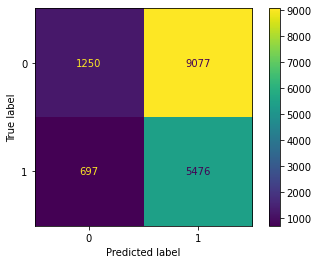

In [ ]:
plot_confusion_matrix(gnb, X_test_svd, y_test);

In [ ]:
gnb.score(X_test_svd, y_test)

0.40763636363636363

## Logistic Regression

0.6265454545454545


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


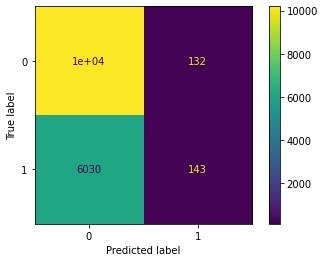

In [ ]:
lrg = LogisticRegression()
lrg.fit(X_train_svd, y_train)
print(lrg.score(X_test_svd, y_test))
plot_confusion_matrix(lrg, X_test_svd, y_test);

## Decision Tree Classifier

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train_svd, y_train)
dec_tree.score(X_test_svd, y_test)

0.6253333333333333

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


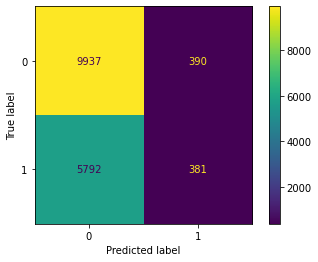

In [ ]:
plot_confusion_matrix(dec_tree, X_test_svd, y_test);

In [ ]:
recall_score(y_true, y_pred, average='macro')


## Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)

In [ ]:
random_forest.fit(X_train_svd,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
random_forest.score(X_test_svd, y_test)

0.5142424242424243

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


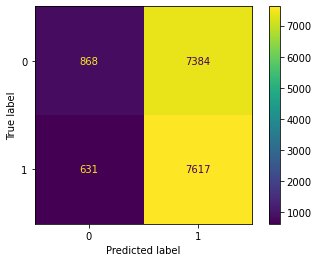

In [ ]:
plot_confusion_matrix(random_forest, X_test_svd, y_test);

## Grid Search on Logistic Regression

In [ ]:
grid={"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l2"]}

In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg_cv=GridSearchCV(estimator = logreg,param_grid = grid,cv=10, verbose = 1)

In [ ]:
logreg_cv.fit(X_train_svd,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             verbose=1)

In [ ]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1000, 'penalty': 'l2'}
accuracy : 0.5176417910447761


## Grid Search on Decision Tree


In [ ]:
%time
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train_svd, y_train)
dec_tree.score(X_test_svd, y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


0.6253333333333333

In [ ]:
grid = {
    'max_depth': [2,3,5,6,7,8],
    'min_samples_leaf': [2,4,6,8,10]
}

In [ ]:
dec_tree_cv = GridSearchCV(estimator = dec_tree, 
                            param_grid = grid, 
                            cv = 4, verbose = 1, scoring = "f1")

In [ ]:
dec_tree_cv.fit(X_train_svd,y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10]},
             scoring='f1', verbose=1)

In [ ]:
print("tuned hyperparameters :(best parameters) ",dec_tree_cv.best_params_)
print("accuracy :",dec_tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'max_depth': 2, 'min_samples_leaf': 2}
accuracy : 0.6675911394941044


In [ ]:
type(dec_tree_cv)

sklearn.model_selection._search.GridSearchCV

## Grid Search on Random Forest

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)

In [ ]:
random_forest.fit(X_train_svd,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
random_forest.score(X_test_svd, y_test)

0.5142424242424243

In [ ]:
grid = {
 'max_depth': [1,2,3,5,7,9],
 'max_features': ['sqrt','log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [ ]:
random_forest_cv = GridSearchCV(estimator = random_forest, param_grid = grid, cv = 4,verbose = 1)

In [ ]:
random_forest_cv.fit(X_train_svd,y_train)

Fitting 4 folds for each of 540 candidates, totalling 2160 fits


In [ ]:
print("tuned hyperparameters :(best parameters) ",random_forest_cv.best_params_)
print("accuracy :",random_forest_cv.best_score_)

## Neural Networks First Simple Model

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=300, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_train_svd, y_train, epochs=150, batch_size=10)

Epoch 1/150
40200/40200 [==============================] - 101s 2ms/step - loss: 0.6928 - accuracy: 0.5014
Epoch 2/150
40200/40200 [==============================] - 99s 2ms/step - loss: 0.6921 - accuracy: 0.5030
Epoch 3/150
40200/40200 [==============================] - 99s 2ms/step - loss: 0.6918 - accuracy: 0.5036
Epoch 4/150
40200/40200 [==============================] - 98s 2ms/step - loss: 0.6916 - accuracy: 0.5053
Epoch 5/150
40200/40200 [==============================] - 98s 2ms/step - loss: 0.6915 - accuracy: 0.5041
Epoch 6/150
40200/40200 [==============================] - 98s 2ms/step - loss: 0.6913 - accuracy: 0.5055
Epoch 7/150
40200/40200 [==============================] - 97s 2ms/step - loss: 0.6912 - accuracy: 0.5062
Epoch 8/150
40200/40200 [==============================] - 97s 2ms/step - loss: 0.6910 - accuracy: 0.5076
Epoch 9/150
40200/40200 [==============================] - 97s 2ms/step - loss: 0.6910 - accuracy: 0.5069
Epoch 10/150
40200/40200 [===================

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test_svd) > 0.5).astype(int)

In [ ]:
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

## Unsupervised Learning. KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',n_init = 100, random_state = 42).fit(X_train_svd)

In [ ]:
# check for optimal number of clusters
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X_train_svd)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
test_data_predictions = kmeans.predict(X_test_svd)

In [ ]:
test_data_predictions

In [ ]:
print("length of test data predictions: ", len(test_data_predictions))
print("length of y_test: ",len(y_test))